In [1]:
## PCA

# Factorization algorithms are useful for data-driven decomposition 
# of spatial and temporal data, for example, to recover spatial patterns 
# with similar temporal profiles. Here, we show how to use some of the factorization
# algorithms in Thunder and visualize the results.

# We start by performing PCA (principal component analysis), which 
# finds patterns that capture most of the variance in the data. First 
# load toy example data, and cache it to speed up repeated queries.

In [2]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image

In [10]:
import os.path as pth
imagepath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), '/Users/greg/Dropbox/Jupyter/SONG_highSNR.tif')

NameError: name 'thunder' is not defined

In [10]:
data = tsc.loadImages(imagepath, inputFormat='tif-stack', nplanes = 1)

In [12]:
data.dtype

'uint16'

In [13]:
sub = data.subsample([5,5,1])

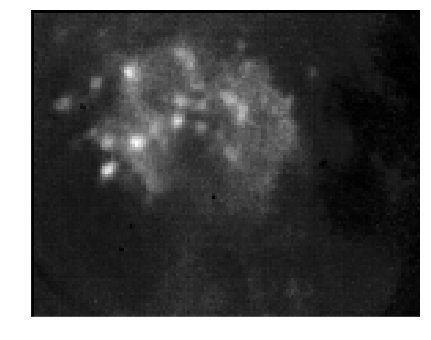

In [14]:
img = sub.stdev()
image(img[:])

In [15]:
data = sub


In [16]:
data.cache()
data.count();

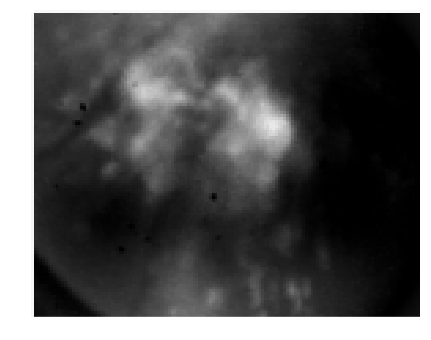

In [17]:
# look at the mean image
im = data.mean()
image(im[:])

In [18]:
ts = data.toTimeSeries()

In [19]:
# Run PCA with three components

from thunder import PCA
model = PCA(k=4).fit(ts)

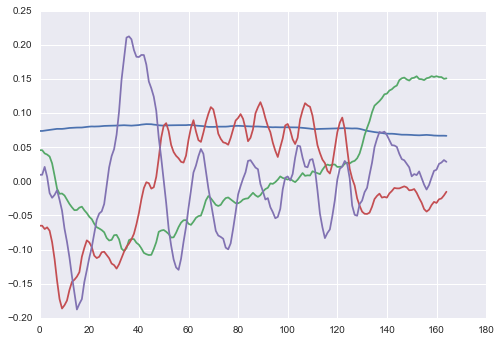

In [20]:
plt.plot(model.comps.T);

In [21]:
# The scores are spatial basis functions. 
# We can pack them into a local array and look at them as images one by one.

imgs = model.scores.pack()
imgs.shape

(4, 112, 142)

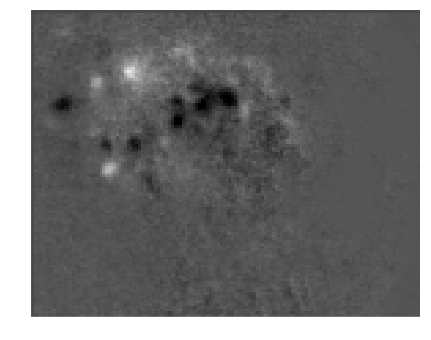

In [29]:
image(imgs[2,:,:], clim=(-0.05,0.1))

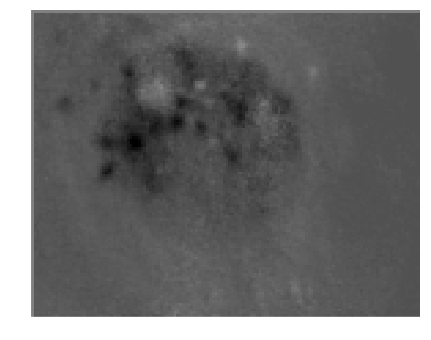

In [31]:
image(imgs[1,:,:], clim=(-0.05,0.1))

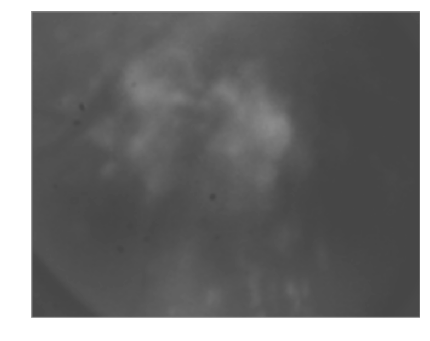

In [214]:
image(imgs[0,:,:], clim=(-0.01,0.02))

In [32]:
# take the last 3 PCs, since the first one dosn't look to informative...
gg = model.comps[1:,:]
gg.shape

(3, 165)

In [38]:
imgs = model.scores.pack()
imgs2 = imgs[1:,:,:]
imgs2.shape

(3, 112, 142)

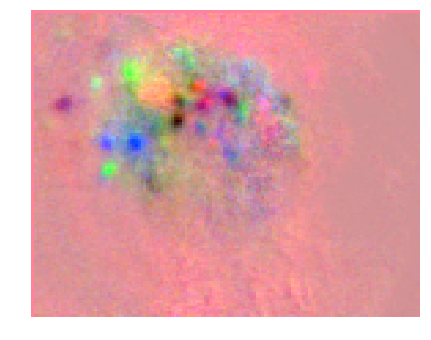

In [46]:
from numpy import amax
sns.set_context('notebook')
maps = Colorize(cmap='rgb', scale=1.3).transform(imgs2)

image(maps,2)

In [49]:
imgs3 = imgs[:3,:,:]
imgs3.shape



(3, 112, 142)

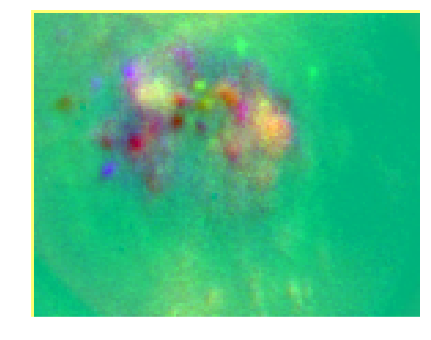

In [52]:
from numpy import amax
sns.set_context('notebook')
maps = Colorize(cmap='rgb', scale=1.1).transform(imgs3)

image(maps,2)

In [44]:
pts = model.scores.subset(500, thresh=0.01, stat='norm')


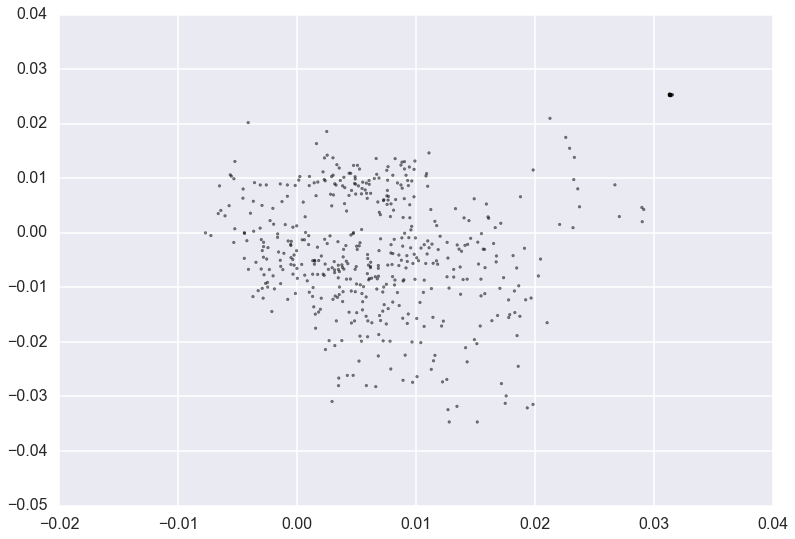

In [86]:
from numpy import newaxis, squeeze
sns.set_context('poster')


clrs = Colorize(cmap='polar', scale=.1).transform([pts[:,0][:,newaxis], pts[:,1][:,newaxis]]).squeeze()
plt.scatter(pts[:,0],pts[:,1], c=clrs, s=7, alpha=0.5);

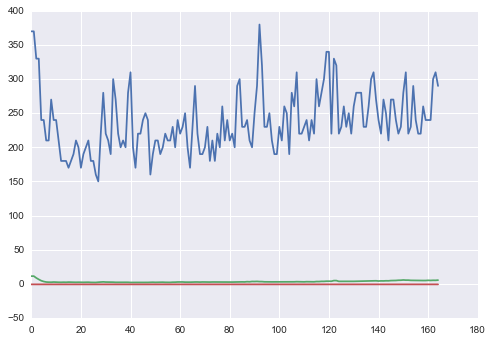

In [84]:
## Take a subset of pixels, and plot them 
plt.plot(ts.normalize().max());
plt.plot(ts.normalize().mean());
plt.plot(ts.normalize().min());

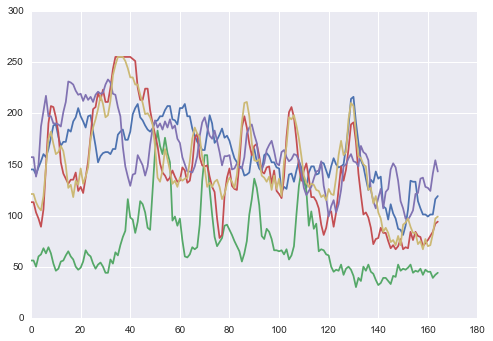

In [61]:
## Take a subset of pixels, and plot them 
# ts is the timsereis, we defiend earlier
examples = ts.subset(nsamples=5, thresh=30)
plt.plot(examples.T); #  [0:20,:]);